<h1>Data Pre-Processing</h1>

In [1]:
import pandas as pd
import numpy as np

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
# plt.style.use('seaborn')

import pylab 
import scipy.stats as stats

In [3]:
import math

<h2>Apple</h2>

In [4]:
apple = pd.read_csv('apple.csv')
apple = apple[apple.columns[1:]]

In [5]:
apple.head()

,app,size,price,rating_count,rating_count_ver,rating,rating_ver,content,category
0,PAC-MAN Premium,100.788,3.99,21292,26,4.0,4.5,4+,Games
1,Evernote - stay organized,158.579,0.00,161065,26,4.0,3.5,4+,Productivity
2,"WeatherBug - Local Weather, Radar, Maps, Alerts",100.524,0.00,188583,2822,3.5,4.5,4+,Weather
3,"eBay: Best App to Buy, Sell, Save! Online Shop...",128.512,0.00,262241,649,4.0,4.5,12+,Shopping
4,Bible,92.774,0.00,985920,5320,4.5,5.0,4+,Books & Reference


In [6]:
#Only concern current version's ratings
apple = apple.drop(['rating','rating_count'],axis=1)
len(apple[apple['rating_count_ver']<0.5].index)

1438

In [7]:
#1438 rows without currrent version rating -> useless
#924 rows without rating for all versions
apple = apple[apple['rating_count_ver']>0]
apple.info()
#7189 entries to 5751 entries

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5751 entries, 0 to 7188
Data columns (total 7 columns):
app                 5751 non-null object
size                5751 non-null object
price               5751 non-null float64
rating_count_ver    5751 non-null int64
rating_ver          5751 non-null float64
content             5751 non-null object
category            5751 non-null object
dtypes: float64(2), int64(1), object(4)
memory usage: 359.4+ KB


In [8]:
apple['type'] = np.where(apple['price']==0.00,0,1)
#Free: 0
#Paid: 1

In [9]:
#need to convert size to float
#add "type" dummy to match with google dataset

apple['size'] = apple['size'].apply(lambda x: x.replace(',','') if ',' in str(x) else x).apply(float)
apple['size'].describe()
#the 4th quartile appears to contain significant outliers

count    5751.000000
mean      211.986633
std       361.362255
min         0.590000
25%        52.200500
50%       103.392000
75%       193.857000
max      4025.970000
Name: size, dtype: float64

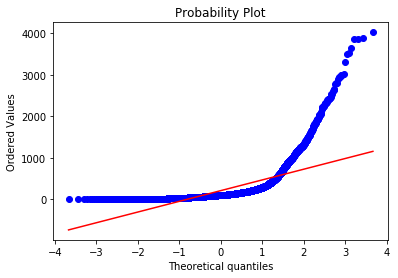

In [10]:
stats.probplot(apple['size'], dist="norm", plot=pylab)
pylab.show()
#VERY skewed - log transform

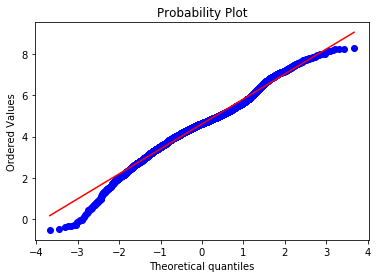

In [11]:
apple['size_log'] = apple['size'].apply(lambda x: math.log(x))

stats.probplot(apple['size_log'], dist="norm", plot=pylab)
pylab.show()
#MUCH BETTER

In [12]:
apple['size_log'].describe()

count    5751.000000
mean        4.613642
std         1.219700
min        -0.527633
25%         3.955092
50%         4.638528
75%         5.267121
max         8.300521
Name: size_log, dtype: float64

In [13]:
Nbins=5
hist_a, edges_a = np.histogram(apple['size_log'], bins=Nbins)
print(hist_a, edges_a)

[  48  457 2732 2114  400] [-0.52763274  1.23799804  3.00362882  4.7692596   6.53489038  8.30052115]


In [14]:
#Also, in case, create size groups
apple['size_level'] = apple['size_log'].apply(lambda x: 0 if (x >= edges_a[0])&(x < edges_a[1]) 
                                          else (1 if (x >= edges_a[1])&(x < edges_a[2]) 
                                                else (2 if (x >= edges_a[2])&(x < edges_a[3]) 
                                                      else (3 if (x >= edges_a[3])&(x < edges_a[4]) 
                                                            else 4))))

In [15]:
apple.groupby('size_level').size()

size_level
0      48
1     457
2    2732
3    2114
4     400
dtype: int64

In [16]:
apple = apple.drop(['size'],axis=1)

In [17]:
#create price groups
apple['price'].describe()

count    5751.000000
mean        1.794112
std         4.732659
min         0.000000
25%         0.000000
50%         0.000000
75%         2.990000
max       249.990000
Name: price, dtype: float64

In [18]:
apple[apple.price > 50]
#the 249.99 is one outlier that skews the data too much -> remove it

,app,price,rating_count_ver,rating_ver,content,category,type,size_log,size_level
115,Proloquo2Go - Symbol-based AAC,249.99,10,3.5,4+,Education,1,6.584465,4
162,NAVIGON Europe,74.99,3,2.5,4+,Navigation,1,4.972677,3
1136,Articulation Station Pro,59.99,130,5.0,4+,Education,1,6.054249,3
3237,FineScanner Pro - PDF Document Scanner App + OCR,59.99,4,4.5,4+,Business,1,4.158477,2


In [19]:
apple = apple[apple['price']<100]

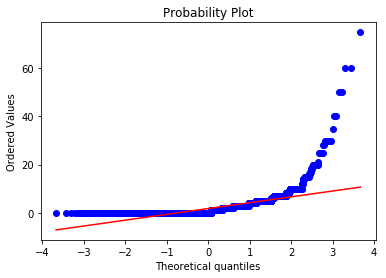

In [20]:
stats.probplot(apple["price"], dist="norm", plot=pylab)
pylab.show()
#Many outliers - better to classify

In [21]:
#among paid app:
apple[apple['price']>0]['price'].describe()

count    2705.000000
mean        3.721978
std         4.183861
min         0.990000
25%         1.990000
50%         2.990000
75%         4.990000
max        74.990000
Name: price, dtype: float64

In [22]:
apple['price_level'] = apple['price'].apply(lambda x: 0 if x<=0.00 
                                            else (1 if (x>0)&(x< 2) 
                                                  else (2 if (x>=2)&(x<3) 
                                                       else (3 if (x>=3)&(x<5)
                                                            else 4))))

In [23]:
apple.groupby('price_level').size()

price_level
0    3045
1    1138
2     616
3     585
4     366
dtype: int64

In [24]:
apple = apple.drop(['price'],axis=1)

In [25]:
apple['rating_ver'].describe()

count    5750.000000
mean        4.069391
std         0.879880
min         1.000000
25%         4.000000
50%         4.500000
75%         4.500000
max         5.000000
Name: rating_ver, dtype: float64

In [26]:
#high-low rating cut off around mean
apple['rating_high']=np.where(apple['rating_ver']>4, 1, 0)

In [27]:
apple = apple.drop(['rating_ver'],axis=1)

In [28]:
#create dummies
print(list(apple['category'].unique()))

['Games', 'Productivity', 'Weather', 'Shopping', 'Books & Reference', 'Finance', 'Entertainment', 'Utilities', 'Travel', 'Social Networking', 'Sports', 'Health & Fitness', 'Photo & Video', 'Business', 'Education', 'Lifestyle', 'Food & Drink', 'News', 'Navigation', 'Medical']


In [29]:
for i in apple['category'].unique():
    name = 'dummy_'+i
    apple[name] = np.where(apple['category']==i,1,0)

In [30]:
apple = apple.drop(['category'],axis=1)

In [31]:
print(apple['content'].unique())

['4+' '12+' '17+' '9+']


In [32]:
apple.groupby('content').size()

content
12+     922
17+     348
4+     3623
9+      857
dtype: int64

In [33]:
for i in apple['content'].unique():
    name = 'dummy_content_'+i
    apple[name] = np.where(apple['content']==i,1,0)

In [34]:
apple = apple.drop(['content'],axis=1)

In [35]:
apple.head()

,app,rating_count_ver,type,size_log,size_level,price_level,rating_high,dummy_Games,dummy_Productivity,dummy_Weather,...,dummy_Education,dummy_Lifestyle,dummy_Food & Drink,dummy_News,dummy_Navigation,dummy_Medical,dummy_content_4+,dummy_content_12+,dummy_content_17+,dummy_content_9+
0,PAC-MAN Premium,26,1,4.613019,2,3,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,Evernote - stay organized,26,0,5.066253,3,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,"WeatherBug - Local Weather, Radar, Maps, Alerts",2822,0,4.610397,2,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,"eBay: Best App to Buy, Sell, Save! Online Shop...",649,0,4.856022,3,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,Bible,5320,0,4.530166,2,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [36]:
#create two separate dataframes: current version & overall version ratings; price & price_level
#drop size - keep log transformed sizes
#drop category&content - use dummies only

#log_size - continuous
apple_slog = apple.drop(['app','size_level'],axis=1)

apple_slog = apple[['rating_high','rating_count_ver','size_log','type','price_level',
                      'dummy_Games','dummy_Productivity','dummy_Weather', 'dummy_Shopping', 
                       'dummy_Books & Reference', 'dummy_Finance', 'dummy_Entertainment', 'dummy_Utilities', 
                       'dummy_Travel', 'dummy_Social Networking', 'dummy_Sports', 'dummy_Health & Fitness', 
                       'dummy_Photo & Video', 'dummy_Business', 'dummy_Education', 'dummy_Lifestyle', 
                       'dummy_Food & Drink', 'dummy_News', 'dummy_Navigation', 'dummy_Medical',
                      'dummy_content_4+','dummy_content_9+','dummy_content_12+','dummy_content_17+']]

apple_slog.head()

,rating_high,rating_count_ver,size_log,type,price_level,dummy_Games,dummy_Productivity,dummy_Weather,dummy_Shopping,dummy_Books & Reference,...,dummy_Education,dummy_Lifestyle,dummy_Food & Drink,dummy_News,dummy_Navigation,dummy_Medical,dummy_content_4+,dummy_content_9+,dummy_content_12+,dummy_content_17+
0,1,26,4.613019,1,3,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,26,5.066253,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,2822,4.610397,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,649,4.856022,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,1,5320,4.530166,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [37]:
#size_level
apple_slevel = apple.drop(['app','size_log'],axis=1)

apple_slevel = apple[['rating_high','rating_count_ver','size_level','type','price_level',
                      'dummy_Games','dummy_Productivity','dummy_Weather', 'dummy_Shopping', 
                       'dummy_Books & Reference', 'dummy_Finance', 'dummy_Entertainment', 'dummy_Utilities', 
                       'dummy_Travel', 'dummy_Social Networking', 'dummy_Sports', 'dummy_Health & Fitness', 
                       'dummy_Photo & Video', 'dummy_Business', 'dummy_Education', 'dummy_Lifestyle', 
                       'dummy_Food & Drink', 'dummy_News', 'dummy_Navigation', 'dummy_Medical',
                      'dummy_content_4+','dummy_content_9+','dummy_content_12+','dummy_content_17+']]

apple_slevel.head()

,rating_high,rating_count_ver,size_level,type,price_level,dummy_Games,dummy_Productivity,dummy_Weather,dummy_Shopping,dummy_Books & Reference,...,dummy_Education,dummy_Lifestyle,dummy_Food & Drink,dummy_News,dummy_Navigation,dummy_Medical,dummy_content_4+,dummy_content_9+,dummy_content_12+,dummy_content_17+
0,1,26,2,1,3,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,26,3,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,2822,2,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,649,3,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,1,5320,2,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


<h2>Google</h2>

In [38]:
google = pd.read_csv('google.csv')
google = google[google.columns[1:]]

In [39]:
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8196 entries, 0 to 8195
Data columns (total 9 columns):
app             8196 non-null object
rating          8196 non-null float64
rating_count    8196 non-null int64
size            7027 non-null float64
installs        8196 non-null int64
type            8196 non-null object
price           8196 non-null float64
content         8196 non-null object
category        8196 non-null object
dtypes: float64(3), int64(2), object(4)
memory usage: 576.4+ KB


In [40]:
#Many apps have size missing - vary by device -> replace with category average
gnull = google[google['size'].isnull()]

In [41]:
gnull.index

Int64Index([  36,   41,   51,   66,   67,   72,   84,   87,   88,   91,
            ...
            8072, 8088, 8090, 8104, 8107, 8108, 8118, 8144, 8184, 8194],
           dtype='int64', length=1169)

In [42]:
for i in list(gnull.index):
    category_match = google.iloc[i]['category']
    google.iloc[i] = google.iloc[i].fillna(google[google['category']==category_match]['size'].describe()['mean'])

In [43]:
google.info()
#all caught up :)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8196 entries, 0 to 8195
Data columns (total 9 columns):
app             8196 non-null object
rating          8196 non-null float64
rating_count    8196 non-null int64
size            8196 non-null float64
installs        8196 non-null int64
type            8196 non-null object
price           8196 non-null float64
content         8196 non-null object
category        8196 non-null object
dtypes: float64(3), int64(2), object(4)
memory usage: 576.4+ KB


In [44]:
google['size'].describe()

count    8196.000000
mean       21.413007
std        21.301297
min         0.008500
25%         5.800000
50%        15.000000
75%        28.105861
max       100.000000
Name: size, dtype: float64

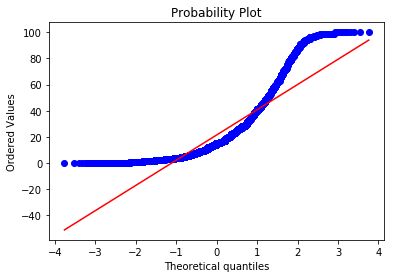

In [45]:
stats.probplot(google['size'], dist="norm", plot=pylab)
pylab.show()
#not very normal

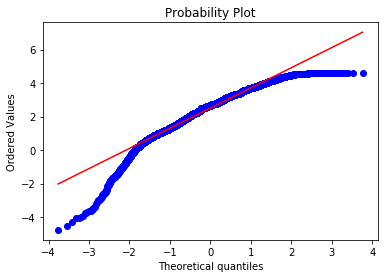

In [46]:
google['size_log'] = google['size'].apply(lambda x: math.log(x))

stats.probplot(google['size_log'], dist="norm", plot=pylab)
pylab.show()

In [47]:
Nbins=5
hist_g, edges_g = np.histogram(google['size_log'], bins=Nbins)
print(hist_g, edges_g)

[  27   93  562 3639 3875] [-4.76768912 -2.89311726 -1.01854539  0.85602647  2.73059833  4.60517019]


In [48]:
google['size_level'] = google['size_log'].apply(lambda x: 0 if (x >= edges_g[0])&(x < edges_g[1]) 
                                          else (1 if (x >= edges_g[1])&(x < edges_g[2]) 
                                                else (2 if (x >= edges_g[2])&(x < edges_g[3]) 
                                                      else (3 if (x >= edges_g[3])&(x < edges_g[4]) 
                                                            else 4))))

In [49]:
google.groupby('size_level').size()

size_level
0      27
1      93
2     562
3    3639
4    3875
dtype: int64

In [50]:
google = google.drop(['size'],axis=1)

In [51]:
google.head()

,app,rating,rating_count,installs,type,price,content,category,size_log,size_level
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159,10000,Free,0.0,4+,Lifestyle,2.944439,4
1,Coloring book moana,3.9,967,500000,Free,0.0,4+,Lifestyle,2.639057,3
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7,87510,5000000,Free,0.0,4+,Lifestyle,2.163323,3
3,Sketch - Draw & Paint,4.5,215644,50000000,Free,0.0,12+,Lifestyle,3.218876,4
4,Pixel Draw - Number Art Coloring Book,4.3,967,100000,Free,0.0,4+,Lifestyle,1.029619,3


In [52]:
#convert type to dummy: Free=0, Paid=1
google['type']=np.where(google['type']=='Free',0,1)

In [53]:
google['price'].describe()
#outlier

count    8196.000000
mean        1.037884
std        16.857882
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: price, dtype: float64

In [54]:
google[google['price']>50]
#the ones above 100 seem to be a scam?

,app,rating,rating_count,installs,type,price,content,category,size_log,size_level
1675,Vargo Anesthesia Mega App,4.6,92,1000,1,79.99,4+,Medical,3.465736,4
3177,most expensive app (H),4.3,6,100,1,399.99,4+,Entertainment,0.405465,2
3303,💎 I'm rich,3.8,718,10000,1,399.99,4+,Lifestyle,3.258097,4
3307,I'm Rich - Trump Edition,3.6,275,10000,1,400.00,4+,Lifestyle,1.987874,3
4101,I am rich,3.8,3547,100000,1,399.99,4+,Lifestyle,0.587787,2
4103,I am Rich Plus,4.0,856,10000,1,399.99,4+,Entertainment,2.163323,3
4104,I am rich VIP,3.8,411,10000,1,299.99,4+,Lifestyle,0.955511,3
4105,I Am Rich Premium,4.1,1867,50000,1,399.99,4+,Finance,1.547563,3
4106,I am extremely Rich,2.9,41,1000,1,379.99,4+,Lifestyle,1.064711,3
4107,I am Rich!,3.8,93,1000,1,399.99,4+,Finance,3.091042,4


In [55]:
google = google[google['price']<100]

In [56]:
google.groupby('type').size()
#Paid app set too small to further split into groups - use Type only

type
0    7592
1     589
dtype: int64

In [57]:
google = google.drop(['price'],axis=1)

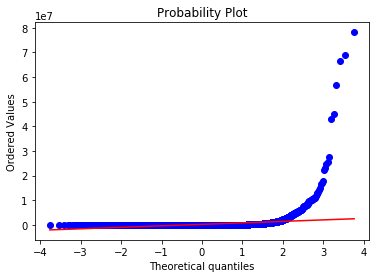

In [58]:
stats.probplot(google["rating_count"], dist="norm", plot=pylab)
pylab.show()

In [59]:
google['rating'].describe()
#in general, Play Store has a higher rating - lower 50% but higher mean

count    8181.000000
mean        4.173805
std         0.536724
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: rating, dtype: float64

In [60]:
#round down mean as the cutoff value
google['rating_high']=np.where(google['rating']>4.2, 1, 0)

In [61]:
google = google.drop(['rating'],axis=1)

In [62]:
#Create Dummies
print(google['category'].unique())

['Lifestyle' 'Games' 'Photo & Video' 'Books & Reference' 'Business'
 'Social Networking' 'Education' 'Entertainment' 'Productivity' 'Finance'
 'Food & Drink' 'Health & Fitness' 'Medical' 'Shopping' 'Sports' 'Travel'
 'Utilities' 'Weather' 'News' 'Navigation']


In [63]:
for i in google['category'].unique():
    name = 'dummy_'+i
    google[name] = np.where(google['category']==i,1,0)

In [64]:
google = google.drop(['category'],axis=1)

In [65]:
print(google['content'].unique())

['4+' '12+' '9+' '17+']


In [66]:
for i in google['content'].unique():
    name = 'dummy_content_'+i
    google[name] = np.where(google['content']==i,1,0)

In [67]:
google = google.drop(['content'],axis=1)

In [68]:
google.head()
#DV could be rating & installs
#IV: size, price (binary as well), category, content, type
#adjust for rating_count?

,app,rating_count,installs,type,size_log,size_level,rating_high,dummy_Lifestyle,dummy_Games,dummy_Photo & Video,...,dummy_Sports,dummy_Travel,dummy_Utilities,dummy_Weather,dummy_News,dummy_Navigation,dummy_content_4+,dummy_content_12+,dummy_content_9+,dummy_content_17+
0,Photo Editor & Candy Camera & Grid & ScrapBook,159,10000,0,2.944439,4,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,Coloring book moana,967,500000,0,2.639057,3,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",87510,5000000,0,2.163323,3,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,Sketch - Draw & Paint,215644,50000000,0,3.218876,4,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,Pixel Draw - Number Art Coloring Book,967,100000,0,1.029619,3,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [69]:
#non-comparable with Apple
google = google.drop(['installs'],axis=1)

In [71]:
#create two separate dataframes: current version & overall version ratings; price & price_level
#drop size - keep log transformed sizes
#drop category&content - use dummies only

#log_size - continuous
google_slog = google.drop(['app','size_level'],axis=1)

google_slog = google[['rating_high','rating_count','size_log','type',
                      'dummy_Games','dummy_Productivity','dummy_Weather', 'dummy_Shopping', 
                       'dummy_Books & Reference', 'dummy_Finance', 'dummy_Entertainment', 'dummy_Utilities', 
                       'dummy_Travel', 'dummy_Social Networking', 'dummy_Sports', 'dummy_Health & Fitness', 
                       'dummy_Photo & Video', 'dummy_Business', 'dummy_Education', 'dummy_Lifestyle', 
                       'dummy_Food & Drink', 'dummy_News', 'dummy_Navigation', 'dummy_Medical',
                      'dummy_content_4+','dummy_content_9+','dummy_content_12+','dummy_content_17+']]

google_slog.head()

,rating_high,rating_count,size_log,type,dummy_Games,dummy_Productivity,dummy_Weather,dummy_Shopping,dummy_Books & Reference,dummy_Finance,...,dummy_Education,dummy_Lifestyle,dummy_Food & Drink,dummy_News,dummy_Navigation,dummy_Medical,dummy_content_4+,dummy_content_9+,dummy_content_12+,dummy_content_17+
0,0,159,2.944439,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,0,967,2.639057,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2,1,87510,2.163323,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
3,1,215644,3.218876,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,967,1.029619,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


In [72]:
#size_level
google_slevel = google.drop(['app','installs','size_log'],axis=1)

google_slevel = google[['rating_high','rating_count','size_level','type',
                      'dummy_Games','dummy_Productivity','dummy_Weather', 'dummy_Shopping', 
                       'dummy_Books & Reference', 'dummy_Finance', 'dummy_Entertainment', 'dummy_Utilities', 
                       'dummy_Travel', 'dummy_Social Networking', 'dummy_Sports', 'dummy_Health & Fitness', 
                       'dummy_Photo & Video', 'dummy_Business', 'dummy_Education', 'dummy_Lifestyle', 
                       'dummy_Food & Drink', 'dummy_News', 'dummy_Navigation', 'dummy_Medical',
                      'dummy_content_4+','dummy_content_9+','dummy_content_12+','dummy_content_17+']]

google_slevel.head()

,rating_high,rating_count,size_level,type,dummy_Games,dummy_Productivity,dummy_Weather,dummy_Shopping,dummy_Books & Reference,dummy_Finance,...,dummy_Education,dummy_Lifestyle,dummy_Food & Drink,dummy_News,dummy_Navigation,dummy_Medical,dummy_content_4+,dummy_content_9+,dummy_content_12+,dummy_content_17+
0,0,159,4,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,0,967,3,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2,1,87510,3,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
3,1,215644,4,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,967,3,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


<h1>Classification</h1>

In [ ]:
# !pip install sklearn --upgrade

In [73]:
from sklearn import linear_model 
from sklearn.model_selection import train_test_split

In [74]:
lm = linear_model.LinearRegression()

In [75]:
def get_classification(predictions,threshold):
    classes = np.zeros_like(predictions)
    for i in range(len(classes)):
        if predictions[i] > threshold:
            classes[i] = 1
    return classes

In [76]:
from sklearn.metrics import confusion_matrix

def model_eval(true_y,predictions,threshold):
#     from sklearn.metrics import confusion_matrix
    tn, fp, fn, tp = confusion_matrix(true_y,get_classification(predictions,threshold)).ravel()
    #tn = predict 0, actual 0
    #fp = predict 1, actual 0
    #fn = predict 0, actual 1
    #tp = predict 1, actual 1
    
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    fpr = fp/(fp+tn)
    f_score = precision*recall/(precision+recall)*2
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    
    print("Precision:\t\t\t%1.4f apps identified as high-rating apps are high rating"%(precision))
    print("Recall/TPR:\t\t\t%1.4f proportion of high-rating apps correctly identified as high-rating"%(recall))
    print("False Positive Rate:\t\t%1.4f proportion of low-rating apps incorrectly identified as high-rating apps"%(fpr))
    print("f-score:\t\t\t%1.4f tradeoff between precision and recall"%(f_score))
    print("Accuracy:\t\t\t%1.4f how well the model has classified"%(accuracy))
    

In [77]:
def model_accuracy(true_y, predictions, threshold):
    tn, fp, fn, tp = confusion_matrix(true_y,get_classification(predictions,threshold)).ravel()
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    print('Given threshold of', threshold, ', the model accuracy is', round(accuracy*100,2),'%.')

In [78]:
#Find best threshold
from sklearn.metrics import roc_curve, auc

#testing - out-sample
def get_roc(true_y, predictions):
    (fpr, tpr, thresholds) = roc_curve(true_y, predictions)

    area = auc(fpr,tpr)
    plt.clf() #Clear the current figure
    plt.plot(fpr,tpr,label="Out-Sample ROC Curve with area = %1.2f"%area)

    plt.plot([0, 1], [0, 1], 'k')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Out sample ROC rocks versus mines')
    plt.legend(loc="lower right")
    plt.show()


In [79]:
def get_prcurve(true_y, predictions):
    from sklearn.metrics import precision_recall_curve
    # import matplotlib.pyplot as plt
    from sklearn.metrics import average_precision_score

    #precision, recall, thresholds = precision_recall_curve(y_train, training_predictions)
    #average_precision = average_precision_score(y_train, training_predictions)


    precision, recall, thresholds = precision_recall_curve(true_y, predictions)
    average_precision = average_precision_score(true_y, predictions)

    step_kwargs = ({'step' : 'post'})

    plt.step(recall, precision, color='b', alpha=0.2,
             where='post')
    plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))

<h2>Apple</h2>

In [80]:
print(apple_slog.corr().shape,
      apple_slevel.corr().shape)

(29, 29) (29, 29)


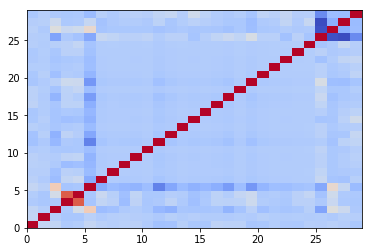

In [81]:
plt.pcolor(apple_slog.corr(),cmap='coolwarm') #https://matplotlib.org/examples/color/colormaps_reference.html
plt.show()

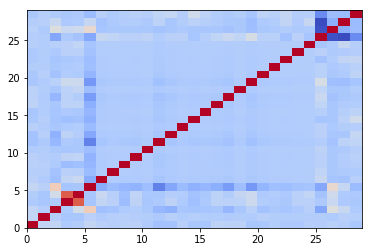

In [82]:
plt.pcolor(apple_slevel.corr(),cmap='coolwarm') #https://matplotlib.org/examples/color/colormaps_reference.html
plt.show()
#Not much different - use size_level for more intuitive sense

In [83]:
apple = apple_slevel

In [84]:
#DV: Rating:high-low
#IV:price/type, rating count, size_log, category dummies, content dummies

train_a, test_a = train_test_split(apple, test_size = 0.3)

x_train_a = train_a.iloc[:,1:]
y_train_a = train_a[['rating_high']]
x_test_a = test_a.iloc[:,1:]
y_test_a = test_a[['rating_high']]

In [85]:
x_test_a.head()

,rating_count_ver,size_level,type,price_level,dummy_Games,dummy_Productivity,dummy_Weather,dummy_Shopping,dummy_Books & Reference,dummy_Finance,...,dummy_Education,dummy_Lifestyle,dummy_Food & Drink,dummy_News,dummy_Navigation,dummy_Medical,dummy_content_4+,dummy_content_9+,dummy_content_12+,dummy_content_17+
5294,11,3,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2191,122,3,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5683,6,3,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3556,6,3,1,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2246,4,2,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [86]:
y_test_a[:5]

,rating_high
5294,0
2191,1
5683,1
3556,0
2246,0


In [87]:
#Train Model
lm.fit(x_train_a,y_train_a)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [88]:
#Predictions
y_pred_a = lm.predict(x_test_a)
y_pred_a

array([[0.5783122 ],
       [0.68330803],
       [0.58166075],
       ...,
       [0.44054287],
       [0.5231955 ],
       [0.35461302]])

In [89]:
get_classification(y_pred_a,0.5)

array([[1.],
       [1.],
       [1.],
       ...,
       [0.],
       [1.],
       [0.]])

In [90]:
confusion_matrix(y_test_a,get_classification(y_pred_a,0.5))

array([[257, 487],
       [213, 768]])

In [91]:
#try different threshold
model_accuracy(y_test_a,y_pred_a,0.2)
model_accuracy(y_test_a,y_pred_a,0.4)
model_accuracy(y_test_a,y_pred_a,0.5)
model_accuracy(y_test_a,y_pred_a,0.6)
model_accuracy(y_test_a,y_pred_a,0.8)

#threshold of 0.5 gives the best accuracy

Given threshold of 0.2 , the model accuracy is 56.87 %.
Given threshold of 0.4 , the model accuracy is 58.49 %.
Given threshold of 0.5 , the model accuracy is 59.42 %.
Given threshold of 0.6 , the model accuracy is 50.09 %.
Given threshold of 0.8 , the model accuracy is 43.36 %.


In [92]:
model_eval(y_test_a,y_pred_a,0.5)

Precision:			0.6120 apps identified as high-rating apps are high rating
Recall/TPR:			0.7829 proportion of high-rating apps correctly identified as high-rating
False Positive Rate:		0.6546 proportion of low-rating apps incorrectly identified as high-rating apps
f-score:			0.6869 tradeoff between precision and recall
Accuracy:			0.5942 how well the model has classified


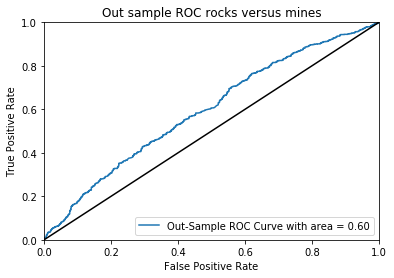

In [93]:
get_roc(y_test_a, y_pred_a)

#better than random guessing

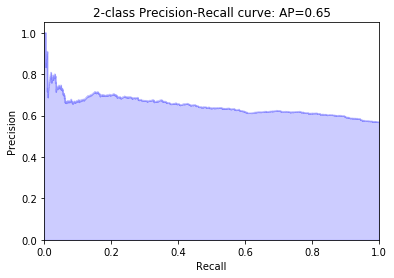

In [94]:
#The precision-recall curve tells us how well we're doing on both factors for different threshold values
get_prcurve(y_test_a, y_pred_a)

<h2>Google</h2>

In [95]:
print(google_slog.corr().shape,
      google_slevel.corr().shape)

(28, 28) (28, 28)


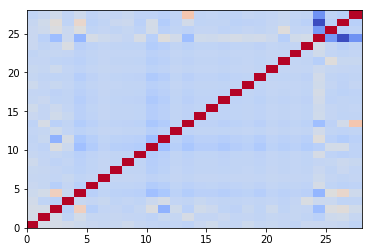

In [96]:
plt.pcolor(google_slog.corr(),cmap='coolwarm') #https://matplotlib.org/examples/color/colormaps_reference.html
plt.show()

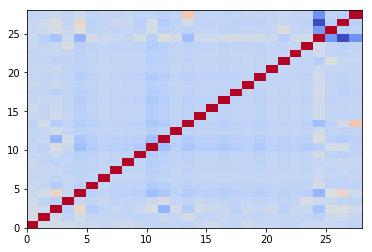

In [97]:
plt.pcolor(google_slevel.corr(),cmap='coolwarm') #https://matplotlib.org/examples/color/colormaps_reference.html
plt.show()
#Again, not much different

In [98]:
google = google_slevel

In [99]:
#DV: Rating:high-low
#IV:price/type, rating count, size_log, category dummies, content dummies

train_g, test_g = train_test_split(google, test_size = 0.3)

x_train_g = train_g.drop(['rating_high'],axis=1)
y_train_g = train_g[['rating_high']]
x_test_g = test_g.drop(['rating_high'],axis=1)
y_test_g = test_g[['rating_high']]

In [100]:
#model & predictions
lm.fit(x_train_g,y_train_g)
y_pred_g = lm.predict(x_test_g)

In [101]:
get_classification(y_pred_g,0.5)

array([[1.],
       [1.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]])

In [102]:
tn, fp, fn, tp = confusion_matrix(y_test_g,get_classification(y_pred_g,0.5)).ravel()
tn, fp, fn, tp

(462, 675, 408, 910)

In [103]:
#try different threshold
model_accuracy(y_test_g,y_pred_g,0.1)
model_accuracy(y_test_g,y_pred_g,0.2)
model_accuracy(y_test_g,y_pred_g,0.4)
model_accuracy(y_test_g,y_pred_g,0.5)
model_accuracy(y_test_g,y_pred_g,0.6)
model_accuracy(y_test_g,y_pred_g,0.8)

#threshold of 0.5 gives the best accuracy

Given threshold of 0.1 , the model accuracy is 53.69 %.
Given threshold of 0.2 , the model accuracy is 53.69 %.
Given threshold of 0.4 , the model accuracy is 54.38 %.
Given threshold of 0.5 , the model accuracy is 55.89 %.
Given threshold of 0.6 , the model accuracy is 51.81 %.
Given threshold of 0.8 , the model accuracy is 46.6 %.


In [104]:
model_eval(y_test_g,y_pred_g,0.5)

Precision:			0.5741 apps identified as high-rating apps are high rating
Recall/TPR:			0.6904 proportion of high-rating apps correctly identified as high-rating
False Positive Rate:		0.5937 proportion of low-rating apps incorrectly identified as high-rating apps
f-score:			0.6269 tradeoff between precision and recall
Accuracy:			0.5589 how well the model has classified


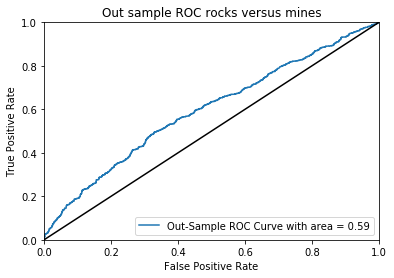

In [105]:
get_roc(y_test_g, y_pred_g)

#better than random guessing

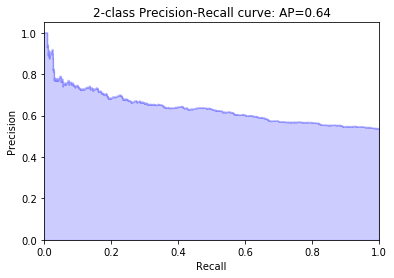

In [106]:
#The precision-recall curve tells us how well we're doing on both factors for different threshold values
get_prcurve(y_test_g, y_pred_g)

<h1>Random Forest</h1>

In [107]:
from sklearn.ensemble import RandomForestClassifier
#start with 10 estimators
forest = RandomForestClassifier(n_estimators=10, random_state=29)

<h2>Apple</h2>

In [108]:
forest_a = forest.fit(x_train_a,np.ravel(y_train_a))

In [110]:
print('RandomForest accuracy:', round(forest_a.score(x_test_a,y_test_a),4))

RandomForest accuracy: 0.549


In [111]:
y_pred_a2 = forest_a.predict(x_test_a)
confusion_matrix(np.ravel(y_test_a),y_pred_a2)

array([[390, 354],
       [424, 557]])

Text(0.5, 0, 'Relative Importance')

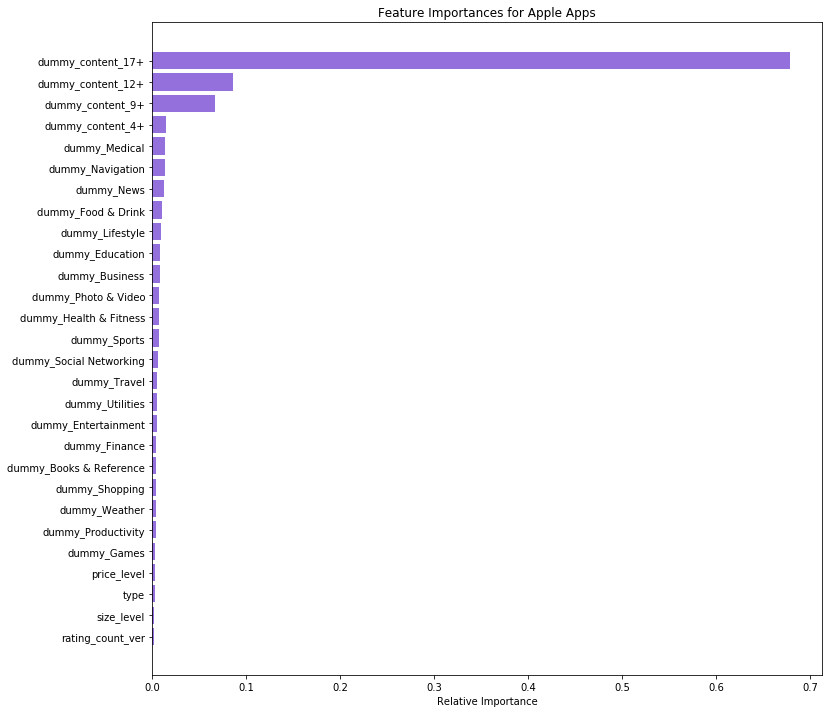

In [113]:
feature_names_a = [key for key in apple if not key=='rating_high']
importances = forest_a.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12,12))
plt.title('Feature Importances for Apple Apps')
plt.barh(range(len(indices)), importances[indices], align='center', color='mediumpurple')
plt.yticks(range(len(indices)),feature_names_a)
plt.xlabel('Relative Importance')

<h3>Finding Best Ensemble</h3>

In [114]:
from sklearn.model_selection import GridSearchCV

In [115]:
parameters = {
     'n_estimators':(10, 30, 50), #the number of trees
     'max_depth':(4,5,6,8,10,15),
     'min_samples_split': (2, 4, 8),
     'min_samples_leaf': (4,8,12,16)
}

model = GridSearchCV(RandomForestClassifier(),parameters,cv=3,iid=False)
model.fit(x_train_a, np.ravel(y_train_a))
model.best_score_, model.best_params_

(0.6156485454538045,
 {'max_depth': 8,
  'min_samples_leaf': 16,
  'min_samples_split': 8,
  'n_estimators': 30})

In [119]:
b_model_a = RandomForestClassifier(max_depth=8,min_samples_leaf=16,min_samples_split=8,n_estimators=30,random_state=29)
b_model_a.fit(x_train_a,np.ravel(y_train_a))

y_pred_a3 = b_model_a.predict(x_test_a)
confusion_matrix(np.ravel(y_test_a),y_pred_a3)

array([[323, 421],
       [232, 749]])

In [130]:
print('Ensemble RandomForest model accuracy:', round(b_model_a.score(x_test_a,y_test_a),4))

Ensemble RandomForest model accuracy: 0.6214


Text(0.5, 0, 'Relative Importance')

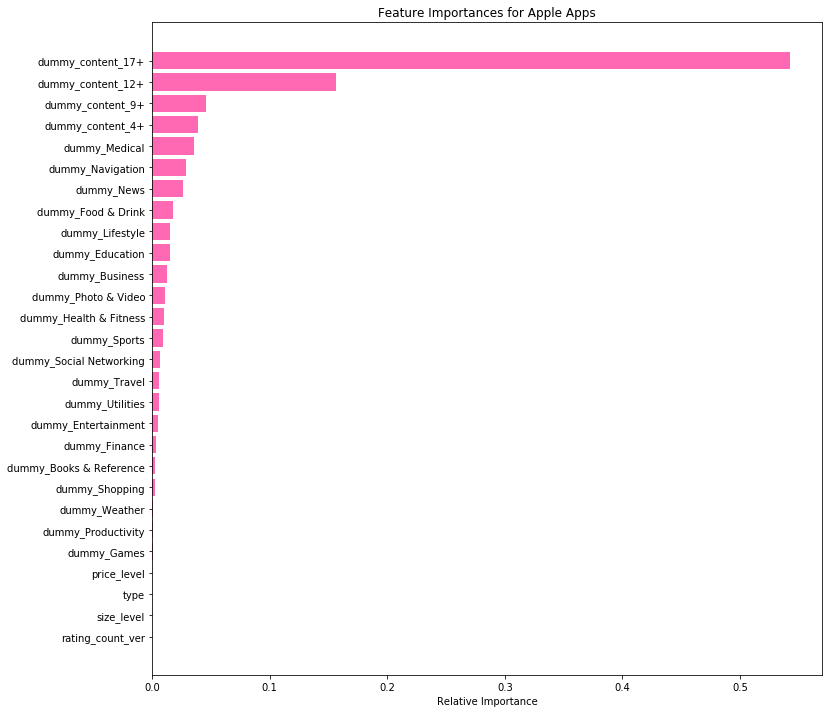

In [121]:
# feature_names_a = [key for key in apple if not key=='rating_high']
importances = b_model_a.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12,12))
plt.title('Feature Importances for Apple Apps')
plt.barh(range(len(indices)), importances[indices], align='center', color='hotpink')
plt.yticks(range(len(indices)),feature_names_a)
plt.xlabel('Relative Importance')

<h2>Google</h2>

In [122]:
forest_g = forest.fit(x_train_g,np.ravel(y_train_g))

In [124]:
print('RandomForest accuracy:', round(forest_g.score(x_test_g,np.ravel(y_test_g)),4))
#not better than classifier yet

RandomForest accuracy: 0.5727


In [125]:
y_pred_g2 = forest_g.predict(x_test_g)
confusion_matrix(np.ravel(y_test_g),y_pred_g2)

array([[664, 473],
       [576, 742]])

Text(0.5, 0, 'Relative Importance')

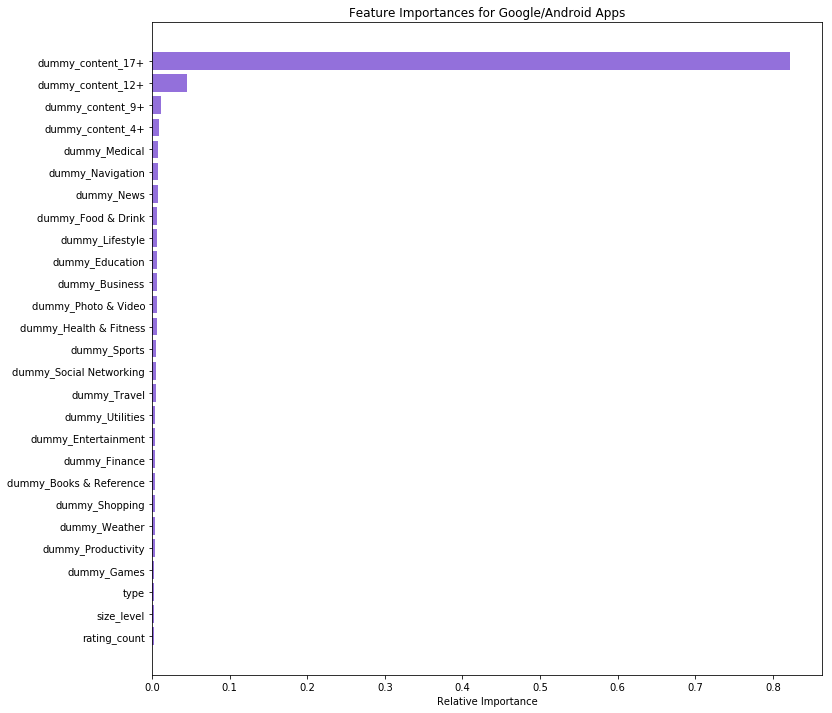

In [127]:
feature_names_g = [key for key in google if not key=='rating_high']
importances = forest_g.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12,12))
plt.title('Feature Importances for Google/Android Apps')
plt.barh(range(len(indices)), importances[indices], align='center', color='mediumpurple')
plt.yticks(range(len(indices)),feature_names_g)
plt.xlabel('Relative Importance')

<h3>Finding Best Ensemble</h3>

In [128]:
parameters = {
     'n_estimators':(10, 30, 50), #the number of trees
     'max_depth':(4,5,6,8,10,15),
     'min_samples_split': (2, 4, 8),
     'min_samples_leaf': (4,8,12,16)
}

model = GridSearchCV(RandomForestClassifier(),parameters,cv=3,iid=False)
model.fit(x_train_g, np.ravel(y_train_g))
model.best_score_, model.best_params_

(0.6133435391369507,
 {'max_depth': 10,
  'min_samples_leaf': 12,
  'min_samples_split': 2,
  'n_estimators': 30})

In [129]:
b_model_g = RandomForestClassifier(max_depth=10,min_samples_leaf=12,min_samples_split=2,n_estimators=30,random_state=29)
b_model_g.fit(x_train_g,np.ravel(y_train_g))

y_pred_g3 = b_model_a.predict(x_test_a)
confusion_matrix(np.ravel(y_test_a),y_pred_a3)

array([[323, 421],
       [232, 749]])

In [131]:
print('Ensemble RandomForest model accuracy:', round(b_model_g.score(x_test_g,np.ravel(y_test_g)),4))
#better than classifier

Ensemble RandomForest model accuracy: 0.613


Text(0.5, 0, 'Relative Importance')

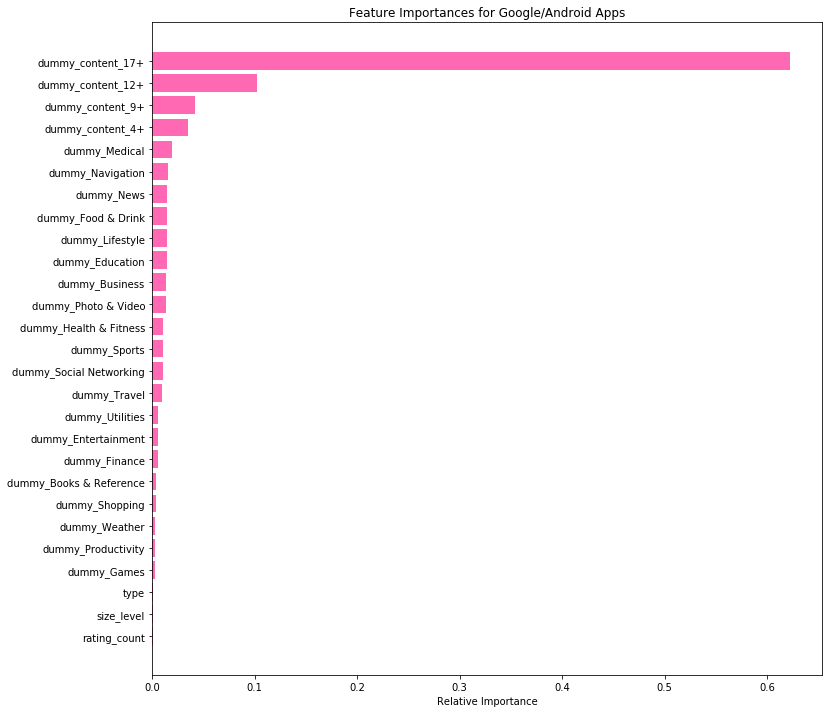

In [132]:
# feature_names_g = [key for key in google if not key=='rating_high']
importances = b_model_g.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12,12))
plt.title('Feature Importances for Google/Android Apps')
plt.barh(range(len(indices)), importances[indices], align='center', color='hotpink')
plt.yticks(range(len(indices)),feature_names_g)
plt.xlabel('Relative Importance')

<h1>Bootstrapping?</h1>

In [133]:
from sklearn.ensemble import BaggingClassifier
bag=BaggingClassifier()

<h2>Apple</h2>

In [134]:
bag_a = bag.fit(x_train_a,np.ravel(y_train_a))

In [136]:
print('Bootstrapping model accuracy:', round(bag_a.score(x_test_a,np.ravel(y_test_a)),4))

Bootstrapping model accuracy: 0.5588


In [137]:
bag_parameters = {
     'n_estimators':(30, 50), #the number of trees
     'max_samples':(30,40,50),
     'max_features':(5,10,20),
     #'oob_score':np.ravel(y_test)
     
}

model = GridSearchCV(BaggingClassifier(),bag_parameters,cv=3,iid=False)
model.fit(x_train_a, np.ravel(y_train_a))
model.best_score_, model.best_params_

(0.5945330000781646,
 {'max_features': 20, 'max_samples': 50, 'n_estimators': 30})

In [138]:
bag_b_model_a = BaggingClassifier(max_features=20,max_samples=50,n_estimators=30)
bag_b_model_a.fit(x_train_a,np.ravel(y_train_a))
print("Model accuracy is:", round(bag_b_model_a.score(x_test_a,y_test_a),4))
#Not the best model

Model accuracy is: 0.5803


<h2>Google</h2>

In [139]:
bag_g = bag.fit(x_train_g,np.ravel(y_train_g))

In [141]:
print('Bootstrapping model accuracy:', round(bag_g.score(x_test_g,np.ravel(y_test_g)),4))
#better than classifier, not yet better than forest

Bootstrapping model accuracy: 0.5727


In [142]:
bag_parameters = {
     'n_estimators':(30, 50), #the number of trees
     'max_samples':(30,40,50),
     'max_features':(5,10,20),
     #'oob_score':np.ravel(y_test)
     
}

model = GridSearchCV(BaggingClassifier(),bag_parameters,cv=3,iid=False)
model.fit(x_train_g, np.ravel(y_train_g))
model.best_score_, model.best_params_

(0.5936069499033414,
 {'max_features': 20, 'max_samples': 50, 'n_estimators': 50})

In [143]:
bag_b_model_g = BaggingClassifier(max_features=20,max_samples=50,n_estimators=50)
bag_b_model_g.fit(x_train_g,np.ravel(y_train_g))
print("Model accuracy is:", round(bag_b_model_g.score(x_test_g,y_test_g),4))
#Not the best either

Model accuracy is: 0.5882
